# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas que añadan aunque sea un poco de información a lo que está ocurriendo.

In [1]:
"""
@author: Manuel H. Arias 
@Twitter: @walyt
@mail: mharias@me.com
""" 

'\n@author: Manuel H. Arias \n@Twitter: @walyt\n@mail: mharias@me.com\n'

## Importación de librerias estándares para DAE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline

import urllib.request

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [3]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla

In [4]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [5]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [6]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [7]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [8]:
df.describe()

,ine_code,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,...,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7
count,12790.000000,4010.000000,3481.000000,906.000000,1455.000000,8935.000000,8798.000000,10135.000000,6069.000000,7635.000000,...,5914.000000,5235.000000,8097.000000,7733.000000,10074.000000,9423.0,9462.000000,9771.000000,8506.000000,12428.000000
mean,26.499609,53.413466,91.802068,4980.146799,1052.530584,179.460325,24.305410,567.735175,4986.919591,7495.198559,...,73.526209,76.085654,87.788440,86.885038,3.911852,inf,4.030163,3.907706,30.081707,58.905126
std,15.009663,129.049563,180.502541,16729.395153,1554.886178,810.455237,92.414498,1760.284310,13086.514501,20098.267982,...,200.133714,193.239648,309.256066,282.215662,20.966226,NaN,21.297633,20.753164,155.071205,232.256365
min,1.000000,-67.000000,-67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-106.000000,-11.700000,-84.000000,-12.700000,-22.000000,-30.8,-1.300000,-3.300000,-4.000000,0.000000
25%,13.250000,3.000000,5.000000,3.000000,155.000000,10.000000,2.000000,88.000000,575.000000,1410.000000,...,3.000000,5.900000,2.000000,2.700000,0.000000,0.0,0.000000,0.000000,0.000000,1.300000
50%,26.000000,18.000000,28.000000,21.000000,485.000000,38.000000,6.000000,195.000000,1833.000000,2744.000000,...,21.000000,27.700000,12.000000,13.400000,0.000000,0.0,0.300000,0.400000,4.000000,7.600000
75%,40.000000,56.000000,92.000000,411.000000,1221.500000,114.000000,18.000000,366.000000,3555.000000,5005.500000,...,64.000000,65.900000,66.000000,68.400000,2.000000,1.0,2.000000,2.000000,16.000000,46.900000
max,52.000000,1992.000000,2030.000000,69363.000000,10275.000000,15227.000000,1528.000000,11641.000000,119233.000000,249483.000000,...,3374.000000,2491.400000,6658.000000,3946.600000,377.000000,inf,350.700000,339.000000,2373.000000,4070.400000


y un muestreo de valores y de algunas columnas de interés:

In [9]:
df.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,...,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,source_name,source,comments
0,2020-01-31,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
1,2020-01-31,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
2,2020-01-31,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
3,2020-01-31,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
4,2020-01-31,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN


In [10]:
df.tail()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,...,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,source_name,source,comments
12761,2020-10-02,Soria,42,Castilla y León,13.0,NaN,NaN,NaN,13.0,6.0,...,20.1,0.0,0.0,0.7,0.4,3.0,NaN,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN
12762,2020-10-02,Toledo,45,Castilla - La Mancha,NaN,314.0,NaN,NaN,271.0,28.0,...,311.3,6.0,0.7,3.0,2.8,NaN,NaN,D.G. de Salud Pública. Consejeria de Sanidad. ...,Notas de prensa JCCM 02/10/2020 - 20:05) https...,NaN
12763,2020-10-02,Valencia/València,46,Comunitat Valenciana,NaN,343.0,NaN,NaN,186.0,23.0,...,325.4,1.0,0.1,2.7,3.4,NaN,NaN,Sanidad Generalitat Valenciana,https://www.gva.es/es/inicio/area_de_prensa/no...,NaN
12764,2020-10-02,Valladolid,47,Castilla y León,280.0,NaN,NaN,NaN,169.0,41.0,...,253.3,7.0,1.5,4.3,3.1,22.0,NaN,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN
12765,2020-10-02,Zamora,49,Castilla y León,49.0,NaN,NaN,NaN,67.0,2.0,...,54.6,2.0,1.6,1.0,1.7,12.0,NaN,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN


In [11]:
df['province'].unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'num_casos_prueba_pcr_avg7',
       'source_name', 'source', 'comments'],
      dtype='object')

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

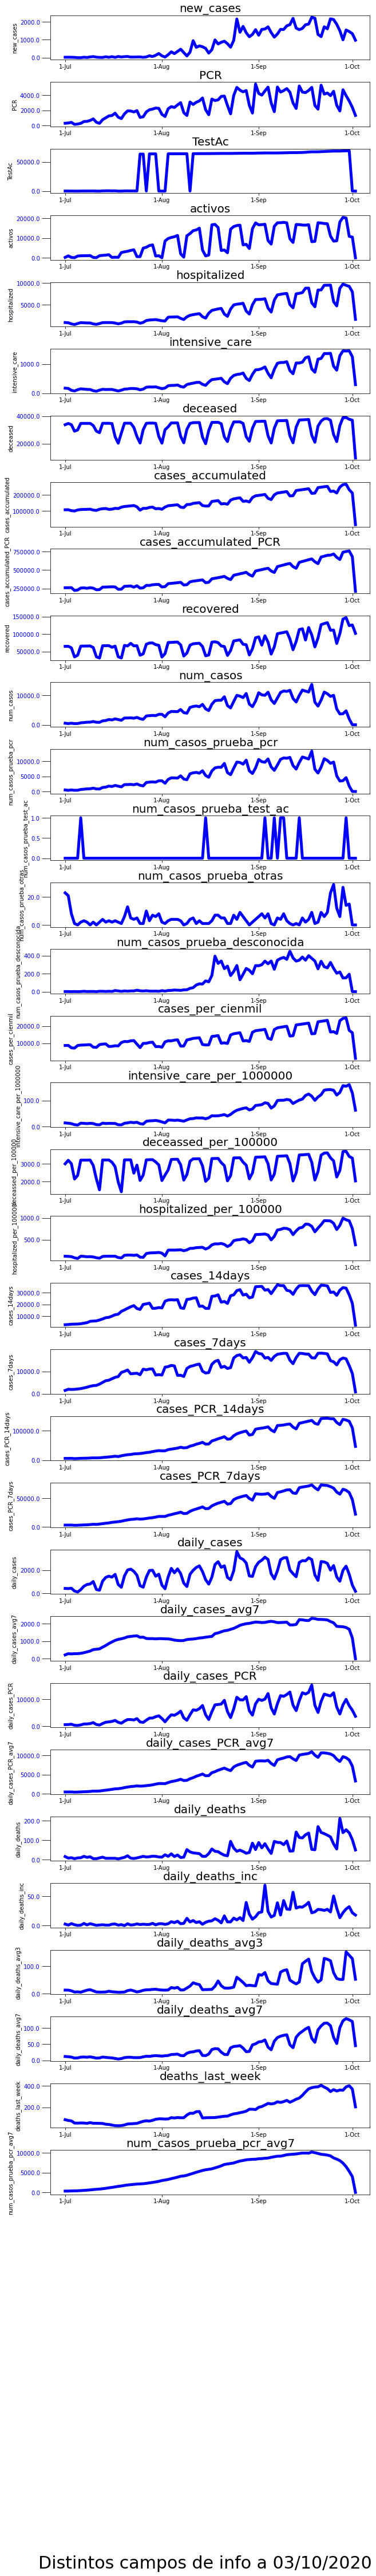

In [14]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

<Figure size 432x288 with 0 Axes>

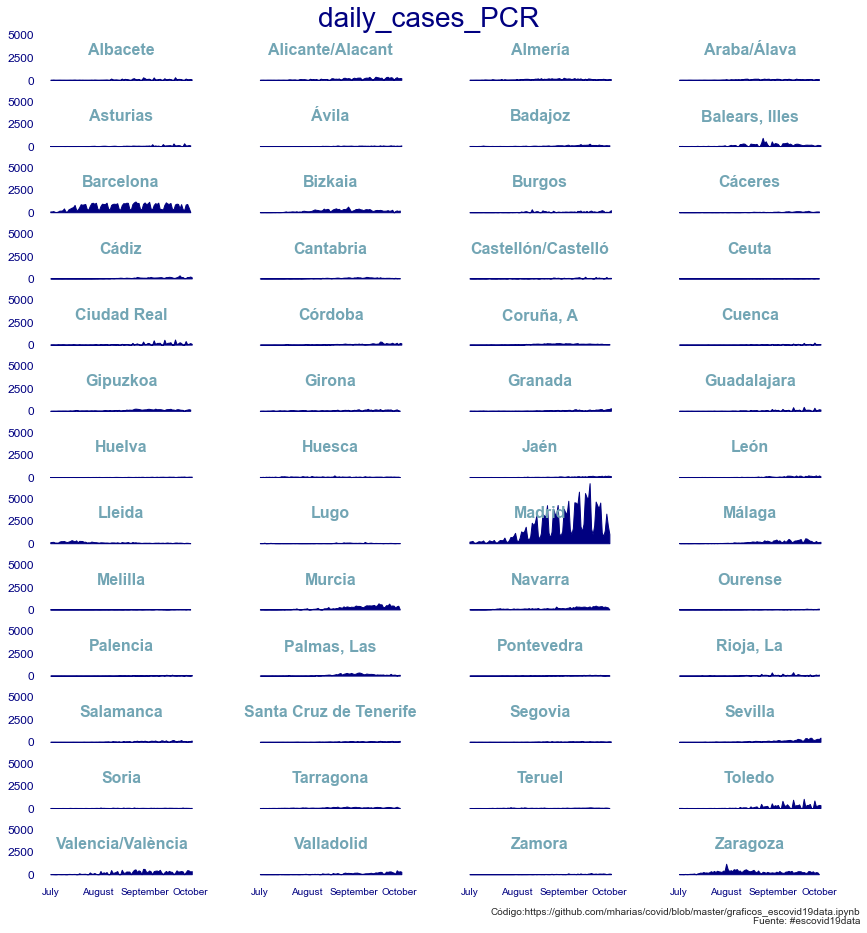

In [15]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
#datos = datos[datos['province'].isin(andalucia)]
#clave='intensive_care_per_1000000'
#clave='PCR'
#clave='deaths_last_week'
#clave='hospitalized_per_100000'
#clave='cases_per_cienmil'
#clave='daily_cases_PCR_avg7'
clave='daily_cases_PCR'
#datos = datos[['date','province','PCR']].fillna(0,axis=1)

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, height=1, palette=pal)
# Título
g.fig.suptitle('{}'.format(clave),fontsize=28,color='navy')
g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
g.fig.text(1,0.01,'Código:{}'.format(github_url),
           fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps
g.map(plt.fill_between, 'date',clave,color='navy')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=pal[10],
            ha="center", va="center", size=16,transform=ax.transAxes)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=10,labelcolor='navy')
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))

# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)

plt.show()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por provincias siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

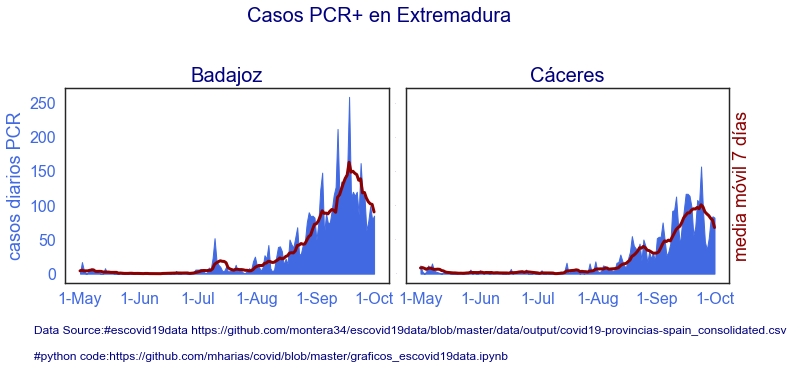

In [16]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(12,5))

f.suptitle('Casos PCR+ en Extremadura',fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,2,1,)
ax1.fill_between(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave],color=color_diarios)
ax1.set_ylabel('casos diarios PCR',size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Badajoz',size=20,color=color_titulos)
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(ax1.get_ylim())

ax2.plot(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave_avg], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
ax2.set_yticks([])
ax2.grid(axis='both')

ax3 = f.add_subplot(1,2,2)

ax3.fill_between(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave],color=color_diarios)

ax3.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax3.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_diarios)
#ax3.set_yticks([])
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax3.set_title('Cáceres',size=20,color=color_titulos)
ax3.set_ylim(ax2.get_ylim())
#ax3.set_yticks(ax1.get_yticks())


ax4 = ax3.twinx()
ax4.grid(axis='both')
ax4.set_ylim(ax3.get_ylim())

ax4.plot(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave_avg], lw=3, color=color_avg)
ax4.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax4.xaxis.set_major_formatter(majorFmt)
ax4.set_ylabel('media móvil 7 días',size=18,color=color_avg)
ax4.set_yticks([])

f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.02,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+_extremadura.png',dpi=100)  
#plt.show()

<Figure size 432x288 with 0 Axes>

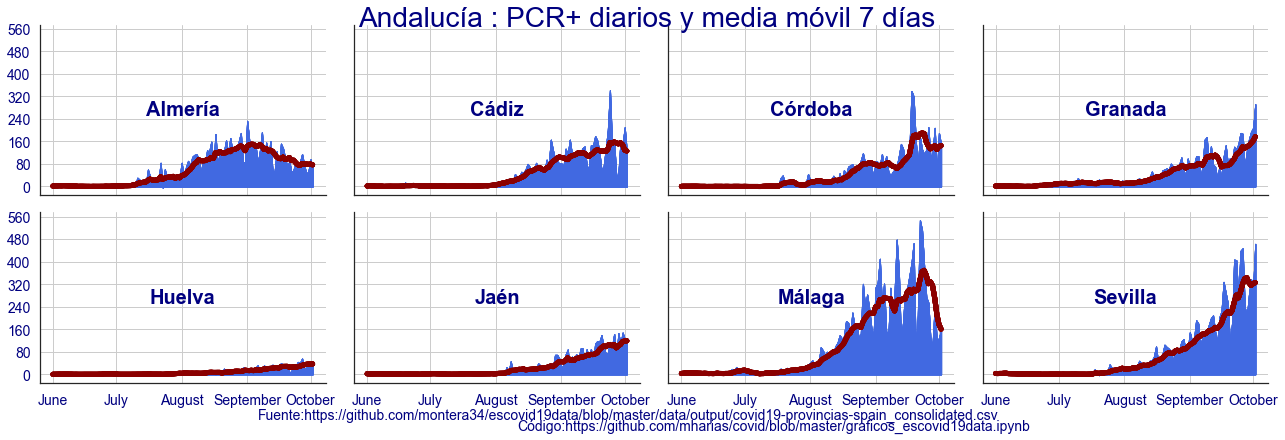

In [17]:
# Preparamos los datos

provincias=['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Andalucía : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.2, 0.035, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.4,0.0,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

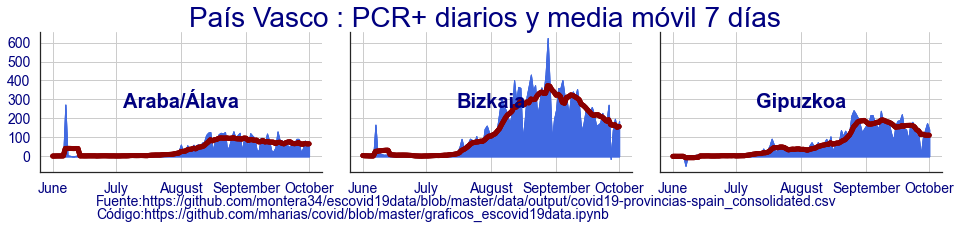

In [18]:
# Preparamos los datos

provincias=['Bizkaia','Araba/Álava','Gipuzkoa']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('País Vasco : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.1, 0.08, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.1,0.0,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

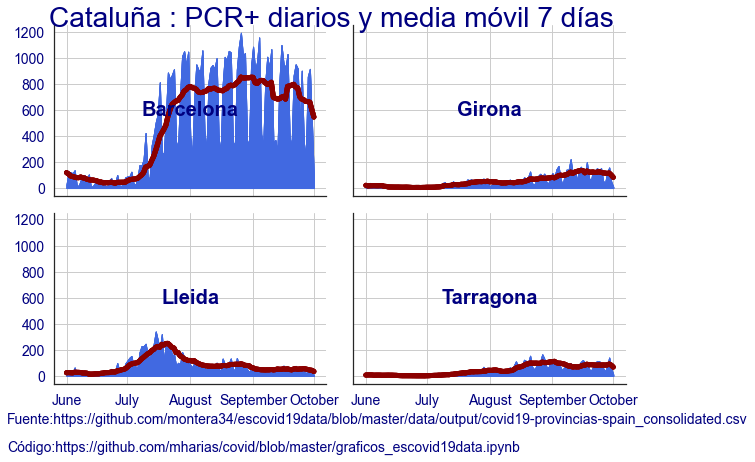

In [19]:
# Preparamos los datos

provincias=['Barcelona','Girona','Lleida','Tarragona']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Cataluña : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

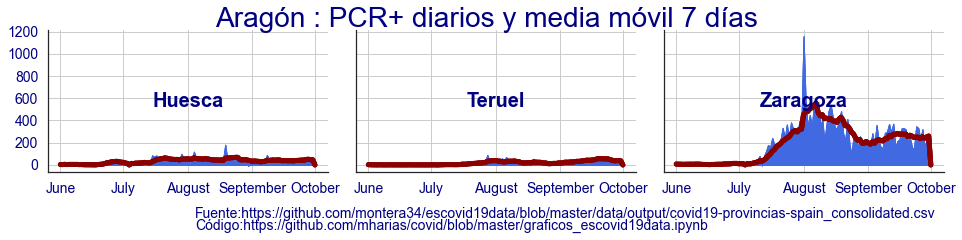

In [20]:
# Preparamos los datos

provincias=['Zaragoza','Teruel','Huesca']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Aragón : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.2, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.2,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

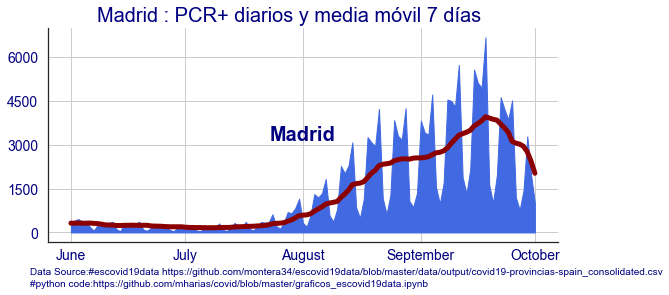

In [21]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
#plt.figure(figsize=(5,10))
#fig, ax1 = plt.subplots()
# Initialize the FacetGrid object

pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=1,aspect=2, height=4, palette=pal)
# Título
g.fig.suptitle('Madrid : PCR+ diarios y media móvil 7 días',wrap=True,
               fontsize=20,color=color_titulos)
g.fig.text(0.05, 0.05, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]),horizontalalignment='left', 
       fontsize=10,color=color_titulos)
#transform=fig.transFigure
g.fig.text(0.05, 0.01,'#python code:{}'.format(github_url),fontsize=10,
           horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
#g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,pad=0,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.grid()

#fig.tight_layout()    
g.savefig('graficos/pcr+_madrid.png',dpi=100)  
#plt.show()

<Figure size 432x288 with 0 Axes>

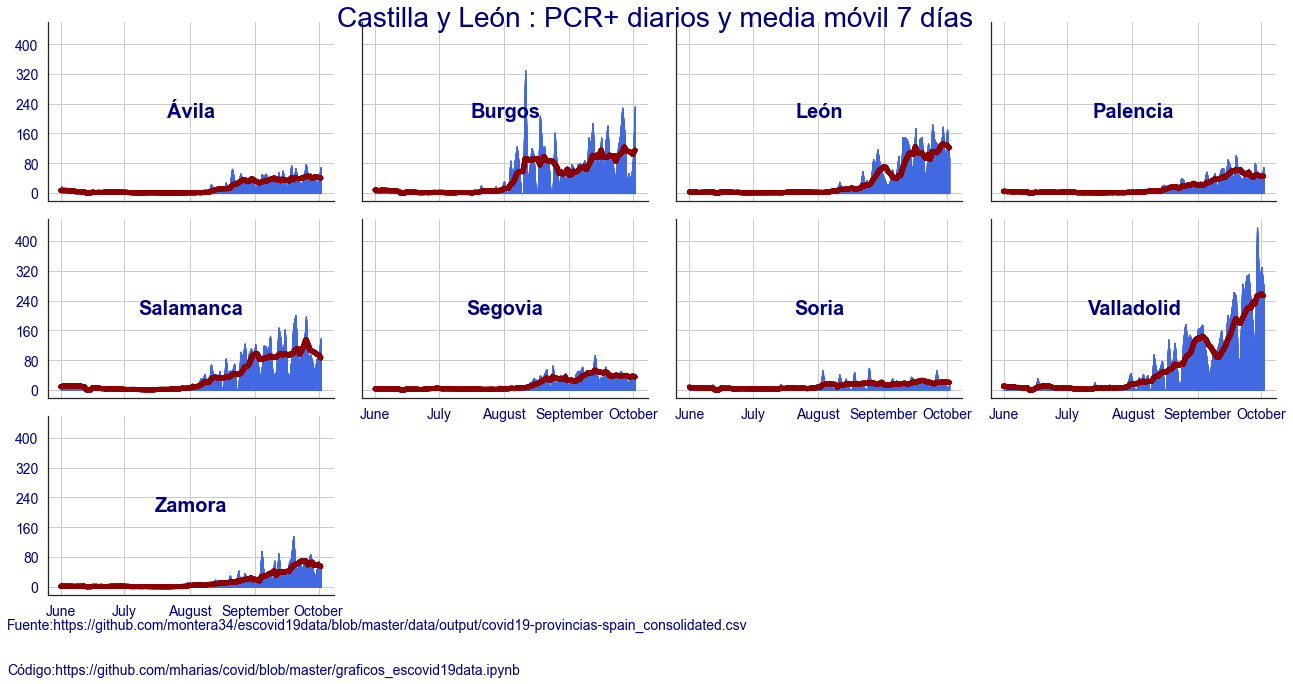

In [22]:
# Preparamos los datos

provincias=['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Castilla y León : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

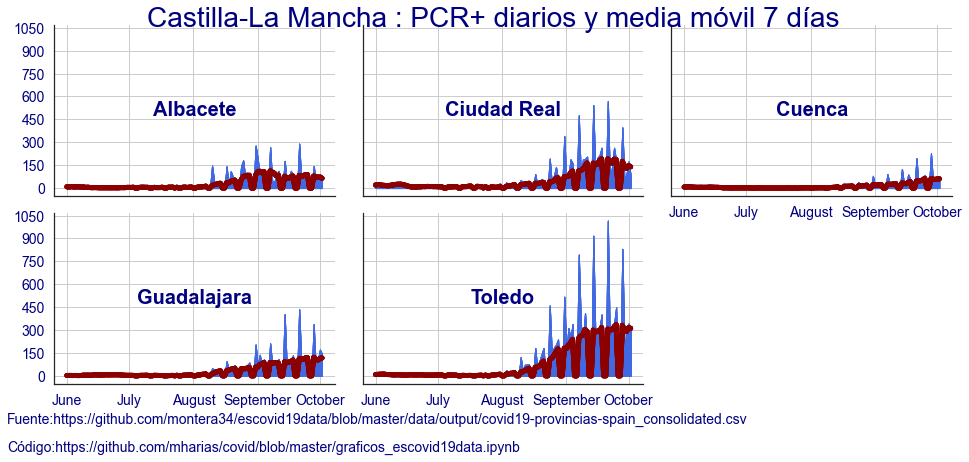

In [23]:
# Preparamos los datos

provincias=['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Castilla-La Mancha : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

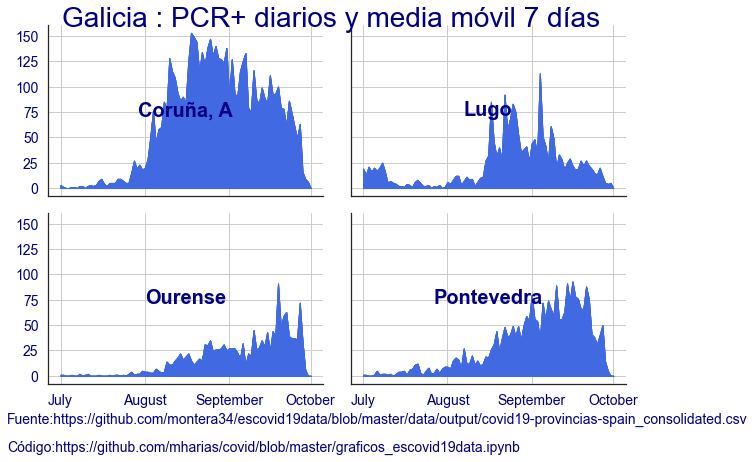

In [24]:
# Preparamos los datos

provincias=['Coruña, A','Lugo','Ourense','Pontevedra']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]
clave_avg='avg'
clave = 'num_casos'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Galicia : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    #g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

# Idea de @lipido, ratio de tasas...

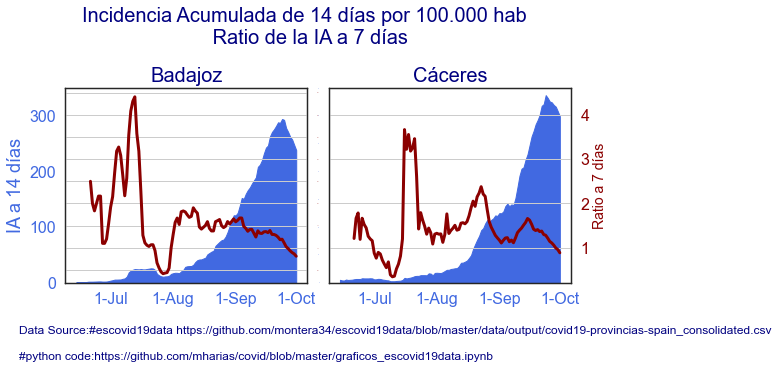

In [45]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='new_cases'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab \n Ratio de la IA a 7 días'
y1='IA a 14 días'
y2='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia][AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

#preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,2,1,)
ax1.fill_between(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][AI],color=color_diarios)
ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Badajoz',size=20,color=color_titulos)
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax1.set_ylim(0,350)

ax2.plot(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)


ax3 = f.add_subplot(1,2,2)

ax3.fill_between(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][AI],color=color_diarios)

ax3.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax3.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_diarios)
#ax3.set_yticks([])
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax3.set_title('Cáceres',size=20,color=color_titulos)
ax3.set_ylim(ax1.get_ylim())
#ax3.set_yticks(ax1.get_yticks())


ax4 = ax3.twinx()
ax4.grid(True)
ax4.set_ylim(ax2.get_ylim())

ax4.plot(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave_ratio], lw=3, color=color_avg)
ax4.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax4.xaxis.set_major_formatter(majorFmt)
ax4.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax4.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.02,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+_extremadura.png',dpi=100)  
#plt.show()

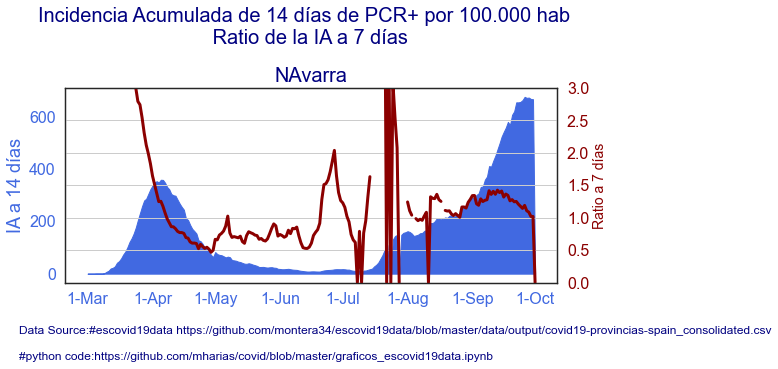

In [26]:
# Preparamos los datos

provincias=['Navarra']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'daily_cases_PCR'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de PCR+ por 100.000 hab \n Ratio de la IA a 7 días'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_PCR_14]\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    datos.loc[datos['province']==provincia,clave_ratio] = \
    datos.loc[datos['province']==provincia][AI].pct_change(periods=7).add(1)    
    
    datos.loc[datos['province']==provincia,clave_casos_popu]=\
    datos.loc[datos['province']==provincia,casos_nuevos]\
    /datos.loc[datos['province']==provincia,'poblacion']*1000000

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('NAvarra',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,3)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.02,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

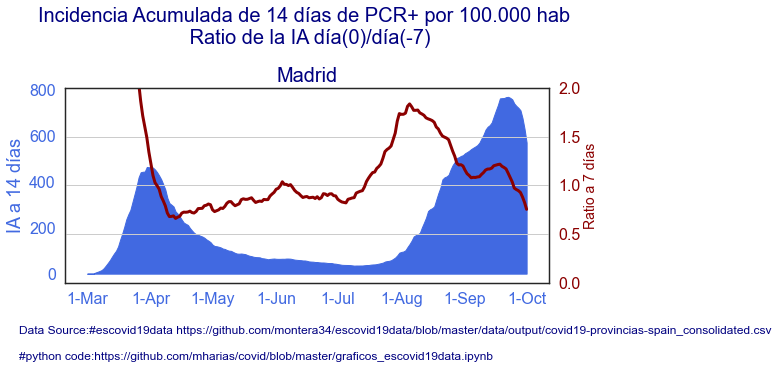

In [40]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'daily_cases_PCR'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de PCR+ por 100.000 hab \n Ratio de la IA día(0)/día(-7)'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_PCR_14]\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    datos.loc[datos['province']==provincia,clave_ratio] = \
    datos.loc[datos['province']==provincia][AI].pct_change(periods=7).add(1)    
    
    datos.loc[datos['province']==provincia,clave_casos_popu]=\
    datos.loc[datos['province']==provincia,casos_nuevos]\
    /datos.loc[datos['province']==provincia,'poblacion']*1000000

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Madrid',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,2)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.02,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

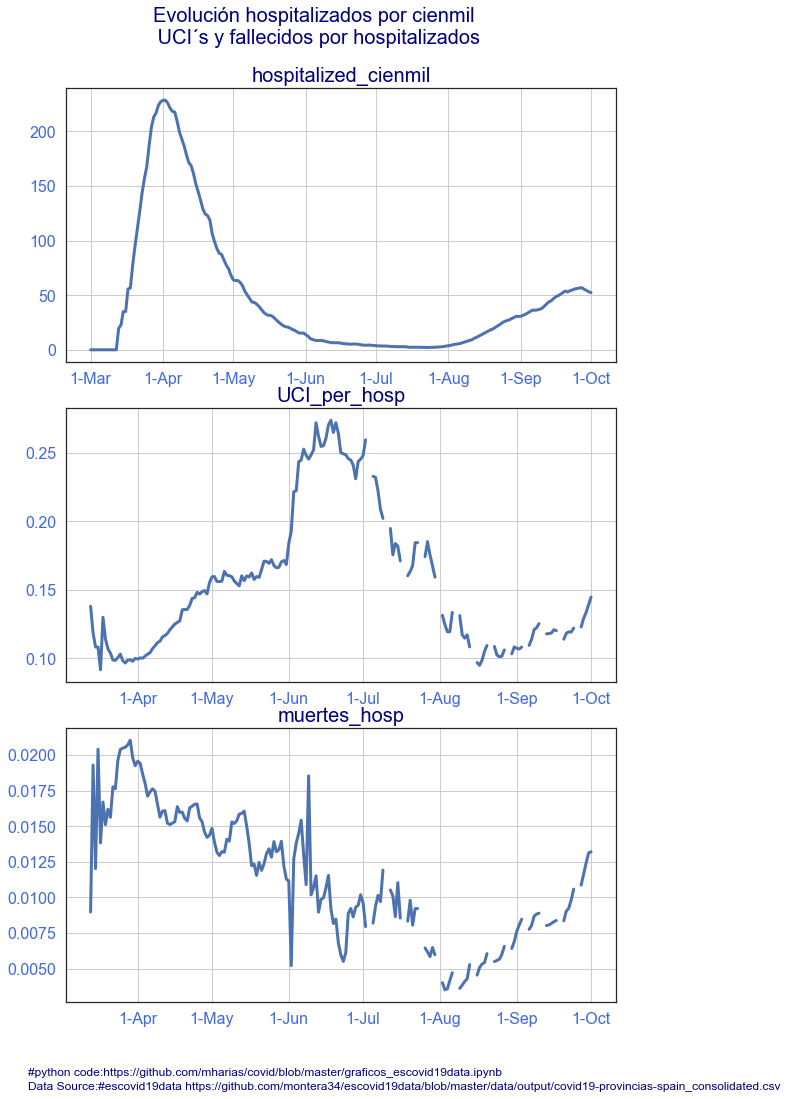

In [41]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]


color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'

hospital='hospitalized'
hospital_per ='hospitalized_cienmil'
hosp_casos = 'hosp_per_casos'
UCI = 'intensive_care'
UCI_per = 'UCI_per'
UCI_casos = 'UCI_per_casos'
UCI_hosp = 'UCI_per_hosp'
muertes = 'daily_deaths'
muertes_acum_per = 'muertes_per_poblacion'
muertes_casos = ' muertes_per_casos'
muertes_avg = 'daily_deaths_avg7'
muertes_hosp = 'muertes_hosp'
casos_avg='daily_cases_PCR_avg7'

ventana_IA=14
titulo = 'Evolución hospitalizados por cienmil \n UCI´s y fallecidos por hospitalizados'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
datos.loc[6426]
    
for provincia in provincias:
    
    

    datos.loc[datos['province']==provincia,hospital_per] = \
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000
    
    datos.loc[datos['province']==provincia,UCI_hosp]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,hospital]
    
    datos.loc[datos['province']==provincia,muertes_hosp]=\
    datos.loc[datos['province']==provincia,muertes_avg]\
    /datos.loc[datos['province']==provincia,hospital]
    
    # preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,15))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
claves=[hospital_per,UCI_hosp,muertes_hosp]

for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    axe.plot(datos['date'].unique(), datos[clave], lw=3, color='b')
    axe.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
    axe.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
    axe.set_title(clave,size=20,color=color_titulos)
    axe.grid(True)
    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    #axe.set_ylim(0,12)

f.text(0.1, 0.0, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.01,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

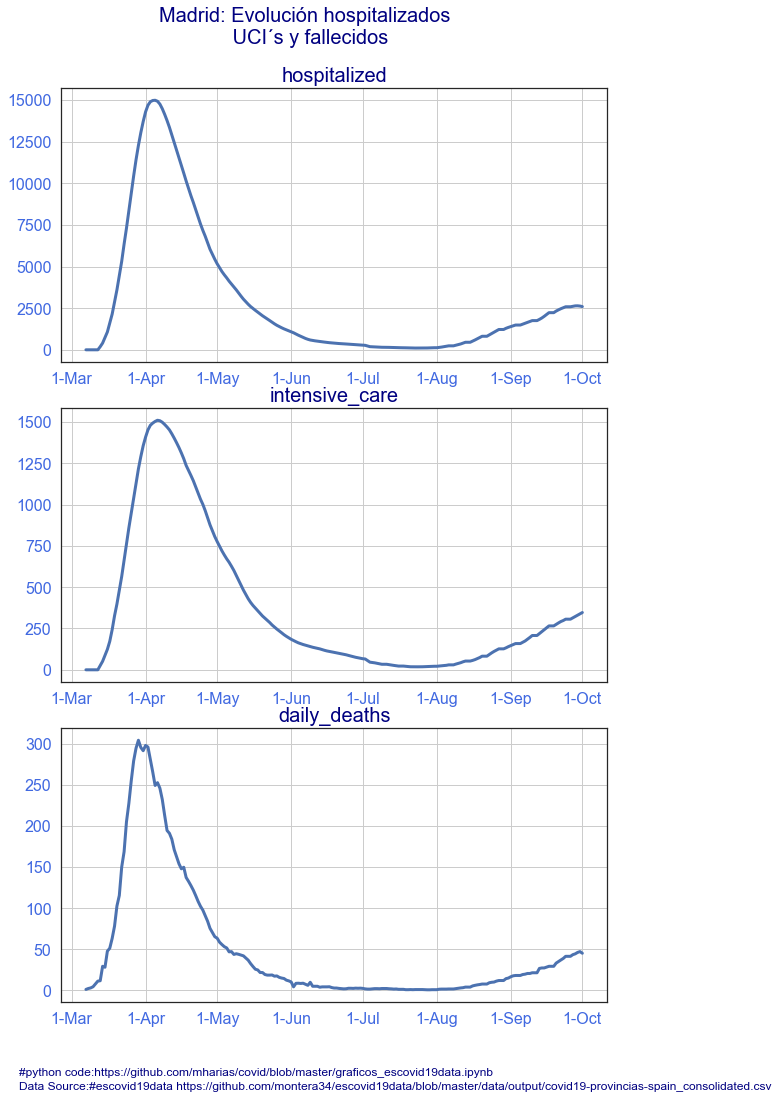

In [42]:
# Preparamos los datos

### Nueva gráfica con uci y deaths

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]


color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'

hospital='hospitalized'
hospital_per ='hospitalized_cienmil'
hosp_casos = 'hosp_per_casos'
UCI = 'intensive_care'
UCI_per = 'intensive_care_per1000000'
UCI_casos = 'UCI_per_casos'
UCI_hosp = 'UCI_per_hosp'
muertes = 'daily_deaths'
muertes_acum_per = 'muertes_per_poblacion'
muertes_casos = ' muertes_per_casos'
muertes_avg = 'daily_deaths_avg7'
muertes_hosp = 'muertes_hosp'
casos_avg='daily_cases_PCR_avg7'

ventana_IA=14
titulo = 'Madrid: Evolución hospitalizados \n UCI´s y fallecidos'
y1='IA a 14 días'
y2='Ratio a 7 días'
  

    
for provincia in provincias:
    
    

    datos.loc[datos['province']==provincia,hospital_per] = \
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000
    
    datos.loc[datos['province']==provincia,UCI_hosp]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,hospital]
    
    
    
    # preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,15))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
claves=[hospital,UCI,muertes]
#nombres_claves={hospital:'hospitalizados',UCI:'UCI',muertes:'Fallecimientos'}

for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    axe.plot(datos['date'].unique(), datos[clave].rolling(window=7).mean(), lw=3, color='b')
    axe.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
    axe.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
    axe.set_title(clave,size=20,color=color_titulos)
    axe.grid(True)
    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    #axe.set_ylim(0,12)

f.text(0.1, 0.0, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.01,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

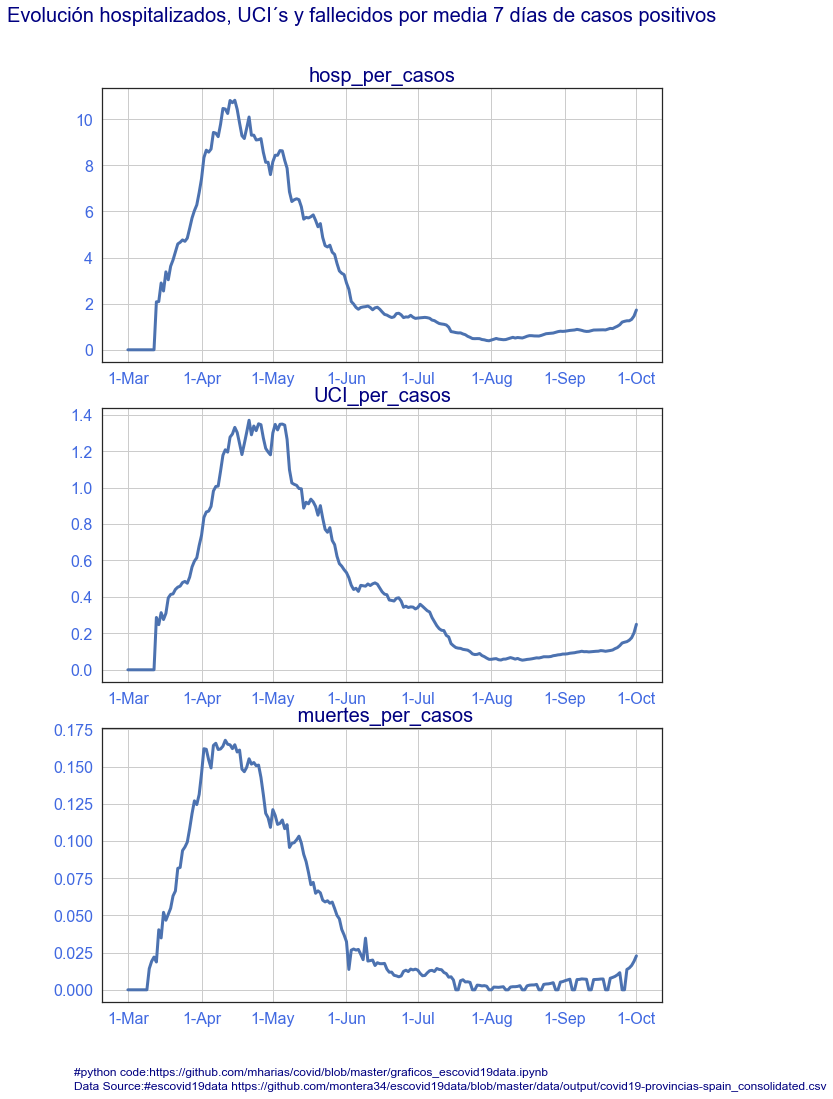

In [30]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]


color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'

hospital='hospitalized'
hospital_per ='hospitalized_cienmil'
hosp_casos = 'hosp_per_casos'
UCI = 'intensive_care'
UCI_per = 'UCI_per'
UCI_casos = 'UCI_per_casos'
muertes = 'daily_deaths'
muertes_acum_per = 'muertes_per_poblacion'
muertes_casos = ' muertes_per_casos'
muertes_avg = 'daily_deaths_avg7'
casos_avg='daily_cases_PCR_avg7'

ventana_IA=14
titulo = 'Evolución hospitalizados, UCI´s y fallecidos por media 7 días de casos positivos'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
datos.loc[6426]
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,muertes_acum_per]=\
    datos.loc[datos['province']==provincia,muertes].cumsum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    datos.loc[datos['province']==provincia,hospital_per] = \
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000
    
    datos.loc[datos['province']==provincia,UCI_per]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    datos.loc[datos['province']==provincia,UCI_casos]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,casos_avg]

    datos.loc[datos['province']==provincia,hosp_casos]=\
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,casos_avg]
    
    datos.loc[datos['province']==provincia,muertes_casos]=\
    datos.loc[datos['province']==provincia,muertes_avg]\
    /datos.loc[datos['province']==provincia,casos_avg]
    # preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,15))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
claves=[hosp_casos,UCI_casos,muertes_casos]

for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    axe.plot(datos['date'].unique(), datos[clave], lw=3, color='b')
    axe.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
    axe.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
    axe.set_title(clave,size=20,color=color_titulos)
    axe.grid(True)
    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    #axe.set_ylim(0,12)

f.text(0.1, 0.0, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.01,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

In [31]:
ax1.get_ylim()

(-38.51490696783051, 808.8130463244406)

In [32]:
datos.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'num_casos_prueba_pcr_avg7',
       'source_name', 'source', 'comments', 'muertes_per_poblacion',
       'hospitalized_cienmil', 'UCI_per', 'UCI_per_casos', 'hosp_per_casos',
       ' muertes_per_casos'],
      dtype='object')

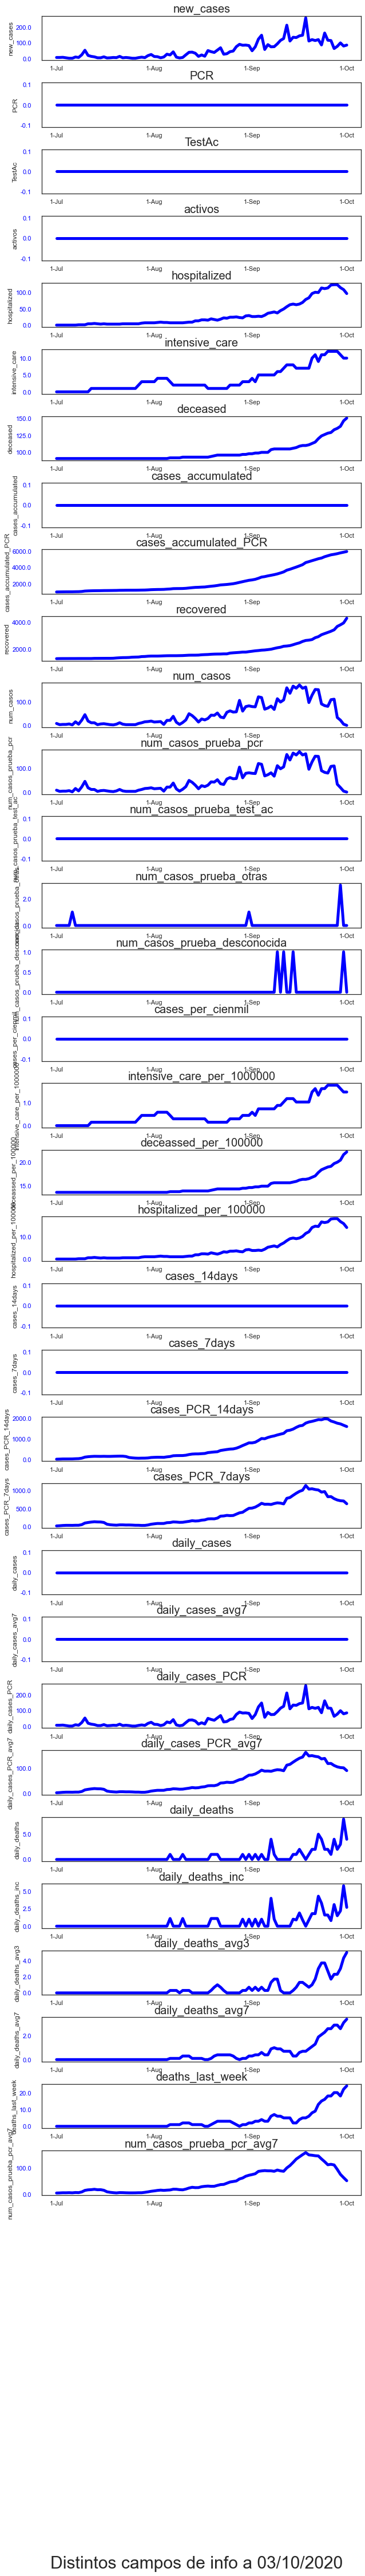

In [33]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
datos = datos.loc[datos['province']=='Badajoz']
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

In [34]:
datos.loc[datos['province']=='Badajoz',['date','new_cases','cases_PCR_14days']]

,date,new_cases,cases_PCR_14days
7910,2020-07-01,6.0,23.0
7962,2020-07-02,6.0,28.0
8014,2020-07-03,7.0,35.0
8066,2020-07-04,4.0,35.0
8118,2020-07-05,1.0,36.0
8170,2020-07-06,1.0,37.0
8222,2020-07-07,9.0,45.0
8274,2020-07-08,6.0,50.0
8326,2020-07-09,23.0,72.0
8378,2020-07-10,52.0,124.0


In [35]:
provincias=['Badajoz']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]

In [36]:
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,hospital] = \
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0)\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

In [37]:
datos[[hospital,muertes,UCI]]

,hospitalized,daily_deaths,intensive_care
1566,0.000000,0.0,0.0
1618,0.000000,0.0,0.0
1670,0.000000,0.0,0.0
1722,0.000000,0.0,0.0
1774,0.000000,0.0,0.0
1826,0.000000,0.0,0.0
1878,0.000000,0.0,0.0
1930,0.000000,0.0,0.0
1982,0.000000,0.0,0.0
2034,0.000000,0.0,0.0


In [38]:
datos['hospital_diff']=datos[hospital].replace(0,np.nan).interpolate().diff()

In [39]:
datos['hospital_diff'].cumsum()

1566              NaN
1618              NaN
1670              NaN
1722              NaN
1774              NaN
1826              NaN
1878              NaN
1930              NaN
1982              NaN
2034              NaN
2086              NaN
2138              NaN
2190              NaN
2242              NaN
2294              NaN
2346              NaN
2398              NaN
2450              NaN
2502     1.484651e-01
2554     7.423255e-01
2606     2.672372e+00
2658     3.414697e+00
2710     5.196278e+00
2762     7.868650e+00
2814     1.009563e+01
2866     1.187721e+01
2918     1.351032e+01
2970     1.336186e+01
3022     1.647963e+01
3074     1.766735e+01
3126     1.751888e+01
3178     1.989432e+01
3230     2.152744e+01
3282     1.811274e+01
3334     2.137897e+01
3386     2.182437e+01
3438     2.078511e+01
3490     1.974586e+01
3542     1.974586e+01
3594     1.647963e+01
3646     1.529190e+01
3698     1.484651e+01
3750     1.395572e+01
3802     1.321339e+01
3854     1.143181e+01
3906     1

In [39]:
datos.loc[11503]

KeyError: 11503